In [ ]:
# SIMPLE LINEAR REGRESSION 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
df = pd.read_csv('height-weight.csv')

In [ ]:
df.isnull().sum()

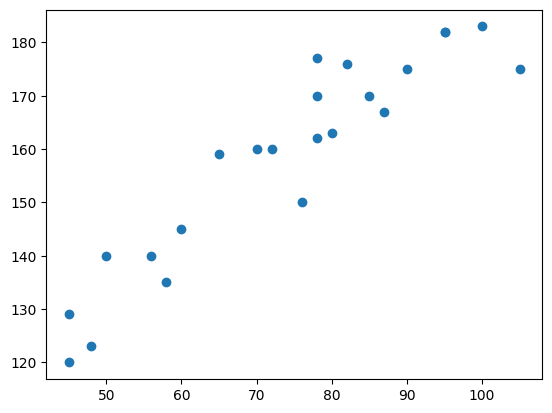

In [7]:
#to check the relation between the features let's first draw scatterplot
plt.scatter(df['Weight'],df['Height'])

In [8]:
#find correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


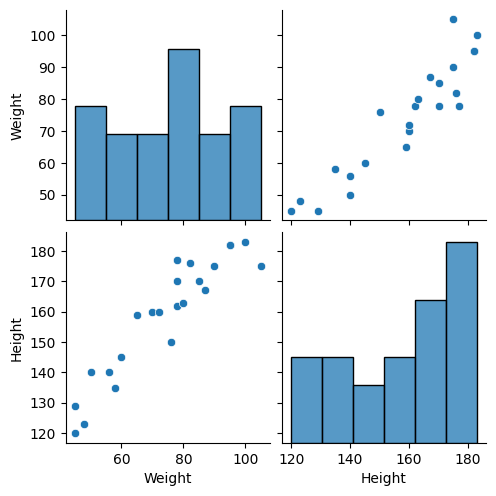

In [9]:
sns.pairplot(df)

In [11]:
# independent and dependent features
X = df[['Weight']]  # always use 2d array or dataframe for independnt values 
y  = df['Height']  # output / dependemt can be 1d array

In [14]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=2)

In [16]:
#standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [17]:
X_train=sc.fit_transform(X_train)

In [18]:
X_test=sc.transform(X_test)

In [19]:
#training the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,y_train)

In [ ]:
regressor.coef_  #slope
regressor.intercept_  #intecept

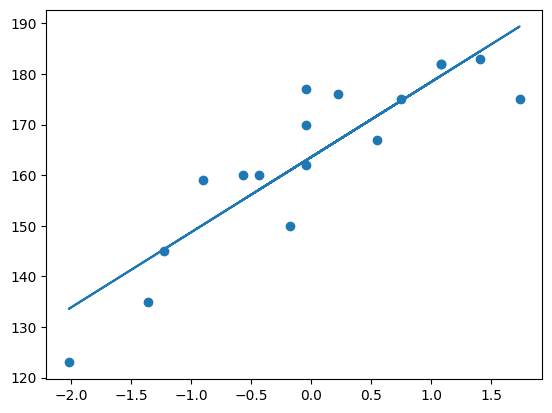

In [27]:
#plot the best fit line for training data
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))

In [28]:
#prediction for test values
y_pred = regressor.predict(X_test)

In [29]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse,mae,rmse)

23.609791588643187 3.3790696744260487 4.858990799398903


In [30]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.9242196418338842


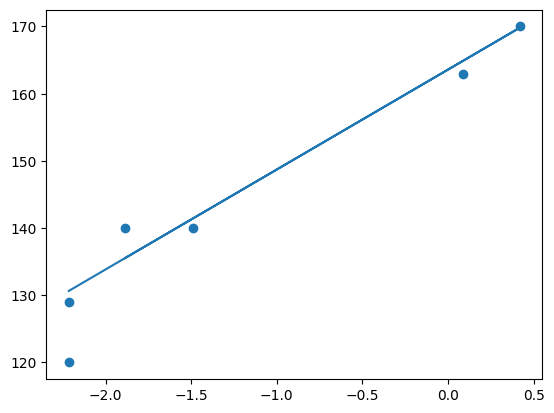

In [33]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)

In [35]:
#ordinary least score method
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [ ]:
prediction = model.predict(X_test)
print(model.summary())

In [40]:
#prediction for new data ... do not forget to scale
regressor.predict(sc.transform([[75]]))

c:\Users\Saqlain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([160.01775858])